In [4]:
import hoomd
import flowermd
import numpy as np
import matplotlib as plt
import mbuild as mb
import warnings
warnings.filterwarnings('ignore')
from flowermd.base import Molecule
from flowermd.library import FF_from_file

from flowermd.base import Lattice
from cmeutils.visualize import FresnelGSD
from flowermd.base import Simulation

In [5]:
def espaloma_mol(file_path):
    mol = mb.load(file_path)
    for p in mol.particles():
        p.name = f"_{p.name}"
    return mol

In [6]:
system_file = '../cy5.mol2'
ff_filepath =  "../cy5.xml"

In [7]:
esp_mol = espaloma_mol(system_file)
cy5 = Molecule(num_mols = 2, compound = esp_mol)

In [8]:
cy5.molecules[0].visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
cy5_ff = FF_from_file(forcefield_files=ff_filepath)
system=Lattice(molecules=cy5, x=1,y=1, n=1)

In [10]:
system.box

Box: Lx=2.149367, Ly=1.980101, Lz=1.946039, xy=0.000000, xz=0.000000, yz=0.000000, 

In [11]:
system.apply_forcefield(
    r_cut=2.5, 
    force_field=cy5_ff, 
    auto_scale=True, 
    scale_charges=True,
    remove_hydrogens=True, #check this
    remove_charges=False) #check this 

In [12]:
snapshot= system.hoomd_snapshot
snapshot.configuration.box *= 3
snapshot.configuration.box

array([18.5255822 , 17.06666374, 16.77308038,  0.        ,  0.        ,
        0.        ])

In [13]:
hoomd_forces = system.hoomd_forcefield
hoomd_forces

In [14]:
working_forces = []
for f in hoomd_forces:
    if not isinstance(f, hoomd.md.special_pair.LJ):
        working_forces.append(f)
working_forces

In [15]:
sim=Simulation(initial_state=snapshot, forcefield=working_forces, reference_values=system.reference_values, gsd_write_freq=100,log_write_freq=100)

Initializing simulation state from a gsd.hoomd.Frame.


In [16]:
lj_force = hoomd_forces[4]

dict(lj_force.params)
#here we see the parameters of the force field t0 and k

{}

In [17]:
sim.box_lengths_reduced

array([18.52558136, 17.06666374, 16.77308083])

In [18]:
system.system.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
sim.run_NVT(n_steps=2000000, kT=2.0, tau_kt=0.01)

*Warning*: charge.pppm: RMS error of 0.210864 is probably too high! 0.210864 0.21085


Step 100 of 2000000; TPS: 246.75; ETA: 2.0 hours, 15.0 minutes
Step 200 of 2000000; TPS: 455.87; ETA: 1.0 hours, 13.0 minutes
Step 300 of 2000000; TPS: 646.37; ETA: 51.6 minutes
Step 400 of 2000000; TPS: 820.05; ETA: 40.6 minutes
Step 500 of 2000000; TPS: 970.6; ETA: 34.3 minutes
Step 600 of 2000000; TPS: 1094.48; ETA: 30.4 minutes
Step 700 of 2000000; TPS: 1216.04; ETA: 27.4 minutes
Step 800 of 2000000; TPS: 1313.86; ETA: 25.4 minutes
Step 900 of 2000000; TPS: 1419.01; ETA: 23.5 minutes
Step 1000 of 2000000; TPS: 1518.38; ETA: 21.9 minutes
Step 1100 of 2000000; TPS: 1600.47; ETA: 20.8 minutes
Step 1200 of 2000000; TPS: 1678.95; ETA: 19.8 minutes
Step 1300 of 2000000; TPS: 1764.42; ETA: 18.9 minutes
Step 1400 of 2000000; TPS: 1834.13; ETA: 18.2 minutes
Step 1500 of 2000000; TPS: 1903.65; ETA: 17.5 minutes
Step 1600 of 2000000; TPS: 1969.11; ETA: 16.9 minutes
Step 1700 of 2000000; TPS: 2006.62; ETA: 16.6 minutes
Step 1800 of 2000000; TPS: 2045.99; ETA: 16.3 minutes
Step 1900 of 2000000;

In [26]:
for writer in sim.operations.writers:
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

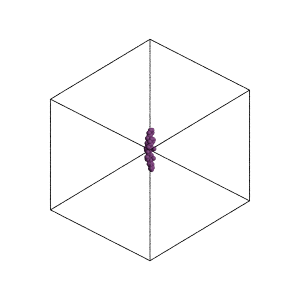

In [27]:
sim_visualizer = FresnelGSD(gsd_file="trajectory.gsd", frame=0, view_axis=(1, 1, 1))
sim_visualizer.view()

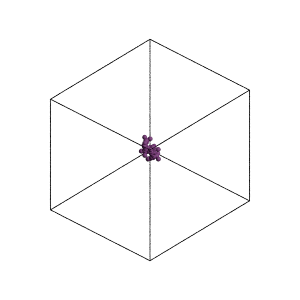

In [28]:
sim_visualizer.frame=-1
sim_visualizer.view()